In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras import layers, callbacks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support,
    classification_report
)
import umap

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
#Mettre une seed pour la reproductibilité
tf.random.set_seed(555)

# **Load la matrice d'expression et les metadata**

In [3]:
X = pd.read_csv("../data/THCA_expression_matrix_final.csv", index_col=0)
X = X.T

In [4]:
X.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,6156,7,2540,1452,297,1075,26323,3481,3414,4228,...,0,0,26,0,0,0,714,0,7,31
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,7191,3,3815,767,276,1069,18403,3861,2562,5715,...,0,0,10,0,0,0,598,0,5,22
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2219,1,735,305,28,303,4710,2995,495,618,...,0,0,3,0,0,0,144,0,0,31
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,5185,0,2594,970,135,71,2986,2033,2469,2901,...,0,2,9,0,0,0,603,0,2,11
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4466,3,1496,820,208,610,25601,2051,1894,2378,...,0,0,5,0,0,0,365,0,3,12


### ajout des metadata à la matrice d'expression

In [ ]:
labels = pd.Index(X.index)   # index = patients

age = (
   labels
   .str.extract(r"AGE=(\d+)ANS")[0]
   .astype(float))

sex = (
   labels
   .str.extract(r"SEX=([a-zA-Z]+)")[0]
   .str.lower()
   .map({"male": 1, "female": 0}))

# ATTENTION !! Eviter d'utiliser les metadata suivantes dans X_full. 
# elles sont ajoutées seulement si on en a besoin pour un modèle

stage = (
    labels
    .str.extract(r"STAGE=([^_]+_[^_]+)")[0]) # ne pas ajouter à X_full

stage_map = {
    "Stade_I": 0,
    "Stade_II": 1,
    "Stade_III": 2,
    "Stade_IV": 3
} # ne pas ajouter à X_full
stage_enc = stage.map(stage_map)

mutation = (
    labels
    .str.extract(r"MUT=([^_]+)")[0]) # ne pas ajouter à X_full


X_full = X.copy()
#X_full["age"] = age.values
#X_full["sex"] = sex.values

X_full

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,6156,7,2540,1452,297,1075,26323,3481,3414,4228,...,0,0,26,0,0,0,714,0,7,31
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,7191,3,3815,767,276,1069,18403,3861,2562,5715,...,0,0,10,0,0,0,598,0,5,22
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2219,1,735,305,28,303,4710,2995,495,618,...,0,0,3,0,0,0,144,0,0,31
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,5185,0,2594,970,135,71,2986,2033,2469,2901,...,0,2,9,0,0,0,603,0,2,11
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4466,3,1496,820,208,610,25601,2051,1894,2378,...,0,0,5,0,0,0,365,0,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID=TCGA-EL-A3TB_AGE=47ANS_SEX=female_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,4742,3,2172,1171,245,372,5861,3069,1740,2560,...,0,0,29,0,0,0,377,0,3,23
ID=TCGA-BJ-A45C_AGE=78ANS_SEX=male_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,3753,4,1491,962,166,184,1663,2433,1244,1713,...,0,0,59,0,0,0,489,0,17,3
ID=TCGA-DJ-A3UX_AGE=46ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4488,5,2061,1151,250,775,9620,2795,2425,2753,...,0,0,24,0,0,0,539,0,6,11
ID=TCGA-DJ-A2PX_AGE=54ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,6131,6,2439,1213,242,1076,8511,3439,3132,2428,...,0,0,8,0,0,0,458,0,4,35


# **Définition de la cible qu'on cherche à prédire**

voir si on peut pas accumuler plusieurs prédictions par la suite

Choisissez la variable que vous voulez prédire en remplacant "choix" par le nom de la liste que vous voulez :

In [93]:
liste_des_prédictions = ["stade_tumoral", "type_tumoral", "mutation"]
choix = "mutation"

### _**préparation des inputs + labels du modèle**_

Pour prédire le stade tumoral on va prédire 1 état parmi 2 possibilités : 
- **0** : stade précoce (stade I et II)
- **1** : stade avancé (stade III et IV) 
c'est utile de regrouper les stades en 2 catégories car il y a peu de patients dans les stades III et IV, ca permet d'avoir un dataset plus équilibré pour l'entrainement du modèle.


ici, j'ai crée une fonction qui réuni les 3 prédictions qu'on voudrait faire. 
Pour chaque prédiction, la variable cible est identifiée (comme label)

| Nombre de classes | Format des labels | Activation finale | Loss |
|------------|------------|------------|------------|
| 2 classes (binaire)    | 0/1    | sigmoid    |binary_crossentropy    |
| ≥3 classes (entiers)   | 0,1,2...    | softmax    |sparse_categorical_crossentropy    |
| ≥3 classes (one-hot)     | [1,0,01, [0,1,0], ...]   | softmax    |categorical_crossentropy    |
| Valeurs continues    | floats  | aucune (ou linear)    |mse / mae    |

In [94]:
from sklearn.preprocessing import LabelEncoder

def build_task(choix, X):
    labels_index = pd.Index(X.index)
    X_out = X.copy()

    if choix == "stade_tumoral":
        # extraire le stade depuis le nom
        stade = pd.Series(stage.values, index=X_out.index)

        # garder uniquement les patients avec un stade défini
        mask = stade != "Stage_NA"
        X_out = X_out.loc[mask]

        # early vs late
        labels = stade.loc[mask].isin(
            ["Stade_III", "Stade_IV"]
        ).astype(int).values

        class_names = ["Early", "Late"]
        n_classes = 1 # nombre de neurones de sortie
        loss = "binary_crossentropy"
        output_activation = "sigmoid"
        encoder = None
    
    elif choix == "type_tumoral":
        tumor_type = pd.Series(labels_index.str.extract(r"TYPE=([^_]+)")[0].values, index=X_out.index)

        encoder = LabelEncoder()
        labels = encoder.fit_transform(tumor_type)
        
        class_names = encoder.classes_.tolist()
        n_classes = len(class_names)
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"

    elif choix == "mutation":
        mutation = pd.Series(labels_index.str.extract(r"MUT=([^_]+)")[0].values, index=X_out.index)

        encoder = LabelEncoder()
        labels = encoder.fit_transform(mutation)
        
    
        class_names = encoder.classes_.tolist()
        n_classes = len(class_names)
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"

    else:
        raise ValueError(
            "le choix doit etre 'stade_tumoral', 'type_tumoral' ou 'mutation'"
        )

    return X_out, labels, encoder, loss, class_names, n_classes, output_activation

X_out, labels, encoder, loss, class_names, n_classes, output_activation = build_task(choix, X_full)

In [95]:
print(f"les labels de {choix} : \n{labels}")

les labels de mutation : 
[0 2 0 2 0 0 0 0 0 0 3 0 2 2 0 2 2 3 0 2 0 0 0 2 0 0 2 3 0 3 3 0 0 0 2 2 0
 2 0 0 0 2 0 2 2 0 0 0 3 0 0 0 3 0 2 2 0 0 2 0 2 0 0 2 2 0 0 3 0 2 0 0 0 2
 2 2 2 0 0 0 0 2 0 0 1 3 0 2 0 2 2 0 2 2 0 2 3 2 3 2 0 2 3 2 3 2 2 2 2 0 2
 2 2 0 0 3 2 2 2 0 2 0 0 2 2 0 0 3 2 0 2 0 2 3 2 2 2 0 3 2 3 0 0 2 2 0 2 0
 2 0 0 2 2 2 0 2 2 2 2 3 0 0 2 0 2 2 2 2 0 2 2 0 0 0 0 2 2 2 2 0 2 0 2 0 3
 0 2 2 0 0 2 2 0 0 0 2 2 1 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 2 0 0 2 0 2 1 3 1
 0 2 0 2 2 0 2 2 3 2 0 0 2 2 0 3 2 0 2 0 2 2 3 0 2 0 0 2 0 2 0 0 2 0 3 0 0
 0 3 2 0 3 3 0 2 2 0 0 2 0 2 3 2 0 0 0 2 0 0 0 2 0 0 2 2 0 2 0 0 0 0 3 0 2
 0 2 0 0 2 0 2 0 2 2 3 0 0 2 2 2 3 2 2 2 0 2 2 0 2 0 3 2 2 3 0 0 0 0 0 2 3
 0 2 2 2 0 2 2 2 2 2 2 0 2 0 0 3 0 3 0 2 3 3 0 0 0 0 3 0 0 2 2 0 0 0 0 0 2
 2 0 2 0 2 3 0 2 0 0 0 2 2 2 0 0 2 2 2 2 0 2 0 2 2 0 3 0 2 2 0 2 0 0 0 2 2
 0 2 1 2 2 2 2 2 0 2 2 0 0 0 2 3 2 2 0 0 3 2 0 2 2 0 2 2 0 0 3 0 2 0 0 2 2
 0 2 0 2 2 0 0 0 3 2 0 2 0 2 0 2 2 2 2 2 0 0 3 0 0 0 0 2 0 2 2 0 3 2 2 2 2

In [96]:
print(f"l'input de la matrice d'expression pour {choix} : \n{X_out}")

l'input de la matrice d'expression pour mutation : 
                                                    ENSG00000000003.15  \
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stad...                6156   
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stad...                7191   
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stad...                2219   
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stag...                5185   
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stad...                4466   
...                                                                ...   
ID=TCGA-EL-A3TB_AGE=47ANS_SEX=female_STAGE=Stad...                4742   
ID=TCGA-BJ-A45C_AGE=78ANS_SEX=male_STAGE=Stade_...                3753   
ID=TCGA-DJ-A3UX_AGE=46ANS_SEX=female_STAGE=Stad...                4488   
ID=TCGA-DJ-A2PX_AGE=54ANS_SEX=female_STAGE=Stad...                6131   
ID=TCGA-EL-A3ZS_AGE=22ANS_SEX=female_STAGE=Stad...                4097   

                                                    ENSG000

In [97]:
print(f"les classes qu'on veut prédire de {choix} sont : \n{class_names}")

les classes qu'on veut prédire de mutation sont : 
['BRAF', 'EIF1AX', 'NO', 'RAS']


In [98]:
values, counts = np.unique(labels, return_counts=True)

for v, c in zip(values, counts):
    print(f"Classe {v} : {c}")

Classe 0 : 229
Classe 1 : 5
Classe 2 : 220
Classe 3 : 51


# **Preprocessing**

il faut réduire le nombre de features (gènes) pour éviter l'overfitting et améliorer les performances du modèle. On peut utiliser des techniques comme la sélection de caractéristiques basées sur l'importance des gènes, ou des méthodes de réduction de dimensionnalité comme juste prendre les gènes les + exprimés, si on a le temps faudrait utiliser un autoendeur !!!!!.

### *HVG*

In [99]:
#Preprocessing HVG
# récupérer les noms
gene_names = X_out.columns
meta_names = X_out.columns

# X_expr = X_out[:, :-2]   # gènes uniquement
# X_meta = X_out[:, -2:]   # age, sex

# filtrage variance
variances = X_out.var(axis=0)

k = 1000
top_genes = variances.sort_values(ascending=False).head(k).index
X_reduced = X_out[top_genes]
X_reduced

,ENSG00000042832.12,ENSG00000115414.21,ENSG00000198804.2,ENSG00000198886.2,ENSG00000210082.2,ENSG00000198938.2,ENSG00000211592.8,ENSG00000211896.7,ENSG00000164733.22,ENSG00000120885.22,...,ENSG00000180398.13,ENSG00000130396.20,ENSG00000143149.12,ENSG00000017483.15,ENSG00000168710.18,ENSG00000074696.13,ENSG00000128567.17,ENSG00000051523.11,ENSG00000156482.11,ENSG00000185630.19
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,2131062,1722652,891163,524661,494913,364170,88333,70179,1036001,1235363,...,16304,23375,11246,7090,22006,19933,20989,5496,15063,25980
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,2150009,622736,291615,150668,134770,131377,10476,14425,871157,935110,...,15287,10224,12033,19760,17122,17747,10364,6559,16792,13819
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2485163,90318,189345,166924,195922,168881,6872,5079,441622,874656,...,3912,2353,2336,11892,4986,5667,4015,13150,15028,3469
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,4231112,6043,253610,170294,134838,128580,4352,14883,161881,146319,...,14661,6044,16782,1518,12611,16065,3478,6936,8813,8641
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,874404,991447,267877,175456,106100,109789,5576,6682,290929,276835,...,10686,15700,5754,7660,10315,12314,9502,6220,11773,10468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID=TCGA-EL-A3TB_AGE=47ANS_SEX=female_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,2084062,181019,397220,283778,182703,228389,39394,51259,812444,765561,...,10954,7527,11381,3764,13829,14622,5404,7288,15844,10606
ID=TCGA-BJ-A45C_AGE=78ANS_SEX=male_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,3683187,5605,616970,386679,245896,226680,88,84,305124,289803,...,10149,8003,11870,3856,8608,6987,8005,7064,21562,7686
ID=TCGA-DJ-A3UX_AGE=46ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,2993363,324850,772270,510406,314334,491447,129739,214328,610522,701500,...,14770,14277,11171,6436,17637,13008,8443,6276,17034,13669
ID=TCGA-DJ-A2PX_AGE=54ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,2877400,154139,776891,477236,281066,317812,897905,924718,563147,558456,...,12146,12145,9903,6679,14438,14409,12107,12388,12464,20875


### *ANOVA*

In [100]:
#Preprocessing n°2, sélection par ANOVA des gènes les plus significatifs pour distinguer les classes
from sklearn.feature_selection import SelectKBest, f_classif
k=500 #nombre de gènes conservés
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_out, labels)

mask = selector.get_support()

X_selected = X_out.loc[:, mask]

f_scores = selector.scores_[mask]
selected_features = X_selected.columns

print(f"Selected Features: {selected_features}")
print(f"F-Scores: {f_scores}")

Selected Features: Index(['ENSG00000002834.18', 'ENSG00000005001.10', 'ENSG00000005884.18',
       'ENSG00000006042.12', 'ENSG00000006071.15', 'ENSG00000006327.14',
       'ENSG00000006534.16', 'ENSG00000006625.18', 'ENSG00000007516.14',
       'ENSG00000008283.16',
       ...
       'ENSG00000285694.1', 'ENSG00000285865.1', 'ENSG00000285873.1',
       'ENSG00000286424.1', 'ENSG00000286804.1', 'ENSG00000286989.1',
       'ENSG00000287241.1', 'ENSG00000287555.1', 'ENSG00000287658.1',
       'ENSG00000287879.1'],
      dtype='object', length=500)
F-Scores: [ 50.4511633   49.47961436  80.6375775   63.9485154   62.31966456
  42.3741295   55.56173548  55.83214237  43.30949268  49.8883433
  43.64556681  54.93885171  55.87983516  58.37952268  90.68153585
  58.29833005  53.68350753  45.1915081   56.50335159  49.05021503
  42.0407116   43.20519734  41.58656945  58.32429883  41.74437329
  43.40857148  46.43924599  62.87788322  51.26443397  56.59206397
  48.49652709  53.98921414  63.85357511  55.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### *UMAP & PCA*

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


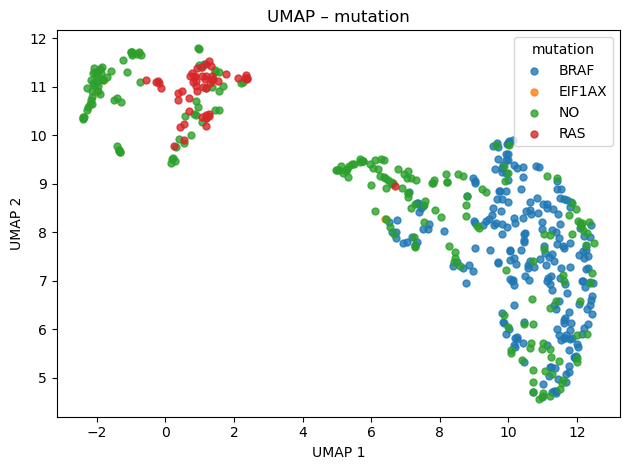

In [101]:
# standardization
X_log = np.log1p(X_selected)

# UMAP 
frequences_umap = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=42).fit_transform(X_log)

plt.figure()
for i, name in enumerate(class_names):
    mask = labels == i
    plt.scatter(frequences_umap[mask, 0], frequences_umap[mask, 1], label=name,s=25, alpha=0.8)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title(f"UMAP – {choix}")
plt.legend(title=f"{choix}", loc="best")
plt.tight_layout()
plt.savefig(f"../results/UMAP_{choix}.pdf")
plt.show()

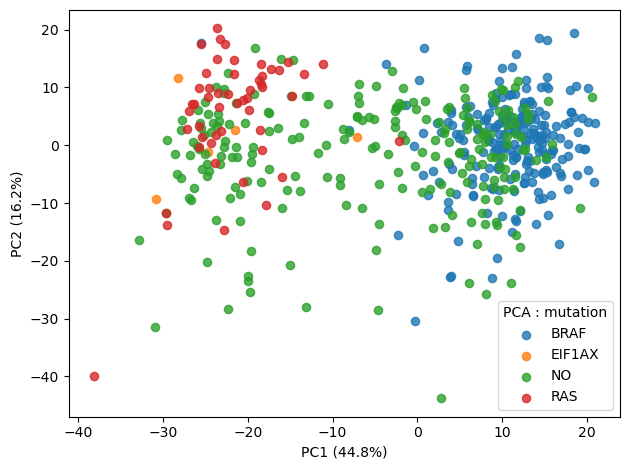

In [102]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X_log))
df_pca = pd.DataFrame(X_pca, index=X_selected.index, columns=["PC1", "PC2"])

# map les labels 
label_map = dict(enumerate(class_names))
df_pca["label"] = labels
df_pca["class_name"] = df_pca["label"].map(label_map)

# Plot
plt.figure()

for i, name in enumerate(class_names):
    subset = df_pca[df_pca["label"] == i]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        label=name,
        alpha=0.8,
        s=35)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title=f"PCA : {choix}", loc="best")
plt.tight_layout()
plt.savefig(f"../results/PCA_{choix}.pdf")
plt.show()


# **Split les données train et test**

protection contre les classes avec trop peu d'échantillons : 

In [103]:
min_samples = 5  

counts = pd.Series(labels).value_counts()
valid_classes = counts[counts >= min_samples].index

mask = pd.Series(labels).isin(valid_classes)

#X_reduced = X_reduced.loc[mask.values]
X_selected = X_selected.loc[mask.values]
labels = labels[mask.values]

In [104]:
labels

array([0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 0, 2, 2, 3, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 3, 0, 3, 3, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 3, 0, 0, 0, 3, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 3, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 3, 0, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 3, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 3, 2, 0, 2, 0,
       2, 3, 2, 2, 2, 0, 3, 2, 3, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 3, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 3, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1,
       3, 1, 0, 2, 0, 2, 2, 0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 3, 2, 0, 2, 0,
       2, 2, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 3, 2, 0, 3,
       3, 0, 2, 2, 0, 0, 2, 0, 2, 3, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 2,

splitting

In [105]:
# Split train/validation/test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_reduced, labels, test_size=0.3, random_state=42, stratify=labels
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nTailles des ensembles:")
print(f"Train: {X_train.shape[0]}")
print(f"Validation: {X_val.shape[0]}")
print(f"Test: {X_test.shape[0]}")



Tailles des ensembles:
Train: 353
Validation: 76
Test: 76


In [106]:
# Split train/validation/test avec la sélection par ANOVA
X_train, X_temp, y_train, y_temp = train_test_split(
    X_selected, labels, test_size=0.3, random_state=42, stratify=labels
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nTailles des ensembles:")
print(f"Train: {X_train.shape[0]}")
print(f"Validation: {X_val.shape[0]}")
print(f"Test: {X_test.shape[0]}")


Tailles des ensembles:
Train: 353
Validation: 76
Test: 76


In [107]:
def print_class_distribution(y, name, class_names=None):
    counts = pd.Series(y).value_counts().sort_index()

    print(f"\n{name} set:")
    for cls, n in counts.items():
        if class_names is not None:
            print(f"  {class_names[cls]}: {n}")
        else:
            print(f"  Class {cls}: {n}")
            
print_class_distribution(y_train, "Train", class_names)
print_class_distribution(y_val,   "Validation", class_names)
print_class_distribution(y_test,  "Test", class_names)


Train set:
  BRAF: 160
  EIF1AX: 3
  NO: 154
  RAS: 36

Validation set:
  BRAF: 34
  EIF1AX: 1
  NO: 33
  RAS: 8

Test set:
  BRAF: 35
  EIF1AX: 1
  NO: 33
  RAS: 7


In [108]:
# séparer les metadata
#X_train_expr = X_train.iloc[:, :-2]
#X_test_expr = X_test.iloc[:, :-2]
#X_val_expr = X_val.iloc[:, :-2]

#Dans le cas de l'absence de métadatas'
X_train_expr = X_train
X_test_expr = X_test
X_val_expr = X_val


# log transform
X_train_log = np.log1p(X_train_expr)
X_test_log  = np.log1p(X_test_expr)
X_val_log  = np.log1p(X_val_expr)

# scaler (FIT SUR LE TRAIN UNIQUEMENT)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled  = scaler.transform(X_test_log)
X_val_scaled  = scaler.transform(X_val_log)

# recombiner : c'est les versions finales des 3 jeux de données
#X_train_final = np.hstack([X_train_scaled, X_train.iloc[:, -2:].values])
#X_val_final   = np.hstack([X_val_scaled,   X_val.iloc[:, -2:].values])
#X_test_final  = np.hstack([X_test_scaled,  X_test.iloc[:, -2:].values])

#dans le cas de l'absence de métadatas
X_train_final= X_train_scaled
X_val_final= X_val_scaled
X_test_final= X_test_scaled

In [109]:
# encode labels si nécessaire
# if labels.dtype == object:
#     label_encoder = LabelEncoder()
#     y_train = label_encoder.fit_transform(y_train)
#     y_test  = label_encoder.transform(y_test)
#     n_classes = len(label_encoder.classes_)
# else:
#     n_classes = len(np.unique(y_train))

### Vérification des données avant entrainement

In [110]:
print("NaN par colonne (top 10):")
print(pd.DataFrame(X_train_final).isna().sum().sort_values(ascending=False).head(10))

NaN par colonne (top 10):
0      0
329    0
342    0
341    0
340    0
339    0
338    0
337    0
336    0
335    0
dtype: int64


In [111]:
def sanity_checks(X, y, name=""):
    assert not np.isnan(X).any(), f"{name}: NaN in X"
    assert not np.isinf(X).any(), f"{name}: Inf in X"
    assert len(np.unique(y)) > 1, f"{name}: single class only"
    print(f"{name} OK")

sanity_checks(X_train_final, y_train, "TRAIN")
sanity_checks(X_val_final, y_val, "VAL")
sanity_checks(X_test_final, y_test, "TEST")

TRAIN OK
VAL OK
TEST OK


ici, il faut faire attention. Si une catégorie est en dessous de 5, on ne peut pas l'utiliser

In [112]:
for split, y in zip(
    ["train", "val", "test"],
    [y_train, y_val, y_test]
):
    print(split, np.bincount(y))

train [160   3 154  36]
val [34  1 33  8]
test [35  1 33  7]


# **Modèle dense à 3 couches**

trop de gènes par rapport au nombre de patients peut accroitre l'overfitting. On fait un modèle qui n'a que 3 couches


In [113]:
def build_model(input_dim, n_classes, output_activation, loss):
    """
    Construit et compile un réseau de neurones dense pour classification
    binaire ou multi-classe selon l'activation de sortie.
    """
    learning_rate=1e-3 
    l2_reg=1e-4
    dropout_rate=0.2
    
    inputs = keras.Input(shape=(input_dim,))

    # Backbone
    x = keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(inputs)
    x = keras.layers.Dropout(dropout_rate)(x)
    
    x = keras.layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(x)

    # Output layer
    outputs = keras.layers.Dense(n_classes, activation=output_activation)(x)
    
    # if output_activation == "sigmoid":
    #     outputs = keras.layers.Dense(1, activation="sigmoid")(x)
    # elif output_activation == "softmax":
    #     outputs = keras.layers.Dense(n_classes, activation=output_activation
    #         units=None,  # sera fixé par la loss via les labels
    #         activation=output_activation
    #     )(x)
    # else:
    #     raise ValueError("Activation de sortie non supportée")

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=loss,
        metrics=["accuracy"]
    )

    return model

In [114]:
# définition du modèle
model = build_model(
    input_dim=X_train_final.shape[1],
    n_classes=n_classes,
    output_activation=output_activation,
    loss=loss
)

# définition du early stop
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

In [115]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,260 (258.83 KB)

 Trainable params: 66,260 (258.83 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_final, y_train)
dummy.score(X_test_final, y_test)


0.4605263157894737

# **Training**

In [117]:
training_history = model.fit(
    X_train_final,
    y_train,
    validation_data=(X_val_final, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6431 - loss: 0.9432 - val_accuracy: 0.6316 - val_loss: 0.9908
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7309 - loss: 0.7041 - val_accuracy: 0.6316 - val_loss: 1.1621
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7790 - loss: 0.5375 - val_accuracy: 0.6842 - val_loss: 0.9258
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8357 - loss: 0.4425 - val_accuracy: 0.6842 - val_loss: 0.8926
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8357 - loss: 0.4273 - val_accuracy: 0.7105 - val_loss: 0.9487
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8584 - loss: 0.3624 - val_accuracy: 0.6711 - val_loss: 1.0553
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8669 - loss: 0.3334 - val_accuracy: 0.6711 - val_loss: 1.0143
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8980 - loss: 0.3088 - val_accuracy: 0.6711 - 

# **Evaluation**

## *Training evaluation*

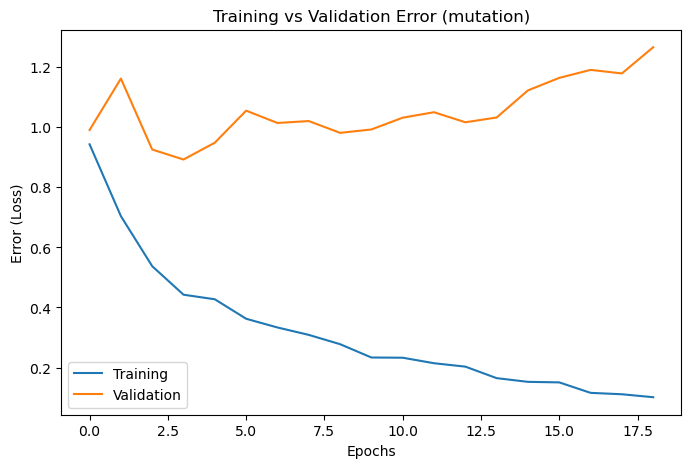

In [118]:
plt.figure(figsize=(8,5))
plt.plot(training_history.history['loss'], label='Training')
plt.plot(training_history.history['val_loss'], label='Validation')
plt.title(f'Training vs Validation Error ({choix})')
plt.xlabel('Epochs')
plt.ylabel('Error (Loss)')
plt.legend()
plt.show()

In [119]:
def predict_classes(model, X, choix):
    probs = model.predict(X)

    if choix == "stade_tumoral":
        # binaire
        preds = (probs.flatten() >= 0.5).astype(int)
    else:
        # multi-classes
        preds = np.argmax(probs, axis=1)

    return probs, preds

In [120]:
def evaluate_model(y_true, y_pred, class_names=None, title="Confusion matrix"):

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro"
    )

    # noms des classes
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]

    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    # plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    print("Evaluation summary:")
    print(f" Accuracy:  {acc:.3f}")
    print(f" Precision (macro): {precision:.3f}")
    print(f" Recall (macro):    {recall:.3f}")
    print(f" F1-score (macro):  {f1:.3f}")
    print("\nDetailed classification report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

    return cm_df

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


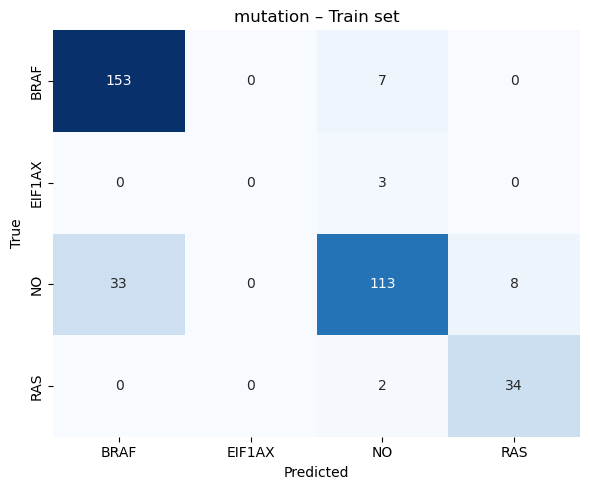

Evaluation summary:
 Accuracy:  0.850
 Precision (macro): 0.634
 Recall (macro):    0.659
 F1-score (macro):  0.642

Detailed classification report:

              precision    recall  f1-score   support

        BRAF       0.82      0.96      0.88       160
      EIF1AX       0.00      0.00      0.00         3
          NO       0.90      0.73      0.81       154
         RAS       0.81      0.94      0.87        36

    accuracy                           0.85       353
   macro avg       0.63      0.66      0.64       353
weighted avg       0.85      0.85      0.84       353



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,BRAF,EIF1AX,NO,RAS
BRAF,153,0,7,0
EIF1AX,0,0,3,0
NO,33,0,113,8
RAS,0,0,2,34


In [121]:
probs_train, y_train_pred = predict_classes(model, X_train_final, choix)

evaluate_model(
    y_train,
    y_train_pred,
    class_names=class_names,
    title=f"{choix} – Train set"
)

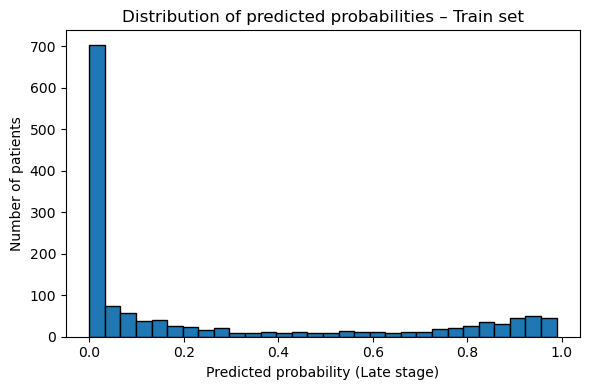

In [122]:
probs = probs_train.flatten()

plt.figure(figsize=(6,4))
plt.hist(probs, bins=30, edgecolor="black")
plt.xlabel("Predicted probability (Late stage)")
plt.ylabel("Number of patients")
plt.title("Distribution of predicted probabilities – Train set")
plt.tight_layout()
plt.show()

In [123]:
def collapse_check(y_true, y_pred):
    unique_preds = np.unique(y_pred)
    if len(unique_preds) == 1:
        print("⚠️ WARNING: Model predicts only one class:", unique_preds[0])
        
collapse_check(y_train, y_train_pred)

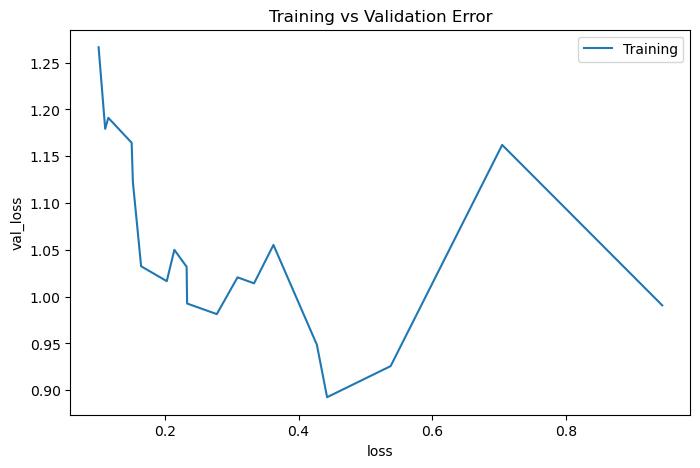

In [124]:
plt.figure(figsize=(8,5))
plt.plot(training_history.history['loss'],training_history.history['val_loss'], label='Training')
# plt.plot(training_history.history['val_loss'], label='Validation')
plt.title('Training vs Validation Error')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend()
plt.show()

## *Test Evaluation*

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


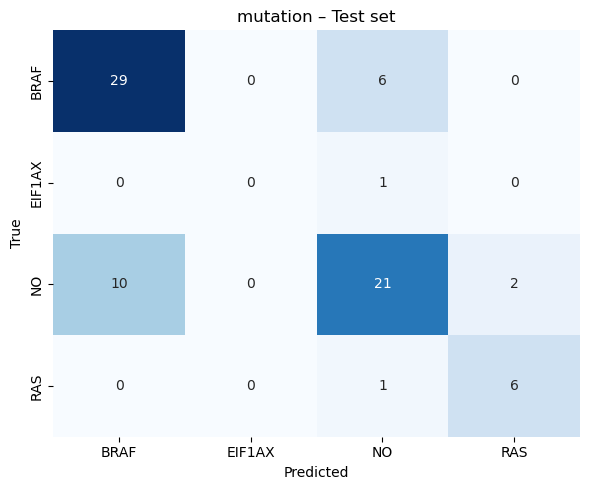

Evaluation summary:
 Accuracy:  0.737
 Precision (macro): 0.554
 Recall (macro):    0.581
 F1-score (macro):  0.565

Detailed classification report:

              precision    recall  f1-score   support

        BRAF       0.74      0.83      0.78        35
      EIF1AX       0.00      0.00      0.00         1
          NO       0.72      0.64      0.68        33
         RAS       0.75      0.86      0.80         7

    accuracy                           0.74        76
   macro avg       0.55      0.58      0.57        76
weighted avg       0.73      0.74      0.73        76



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,BRAF,EIF1AX,NO,RAS
BRAF,29,0,6,0
EIF1AX,0,0,1,0
NO,10,0,21,2
RAS,0,0,1,6


In [125]:
probs_test, y_test_pred  = predict_classes(model, X_test_final, choix)

evaluate_model(
    y_test,
    y_test_pred,
    class_names=class_names,
    title=f"{choix} – Test set"
)

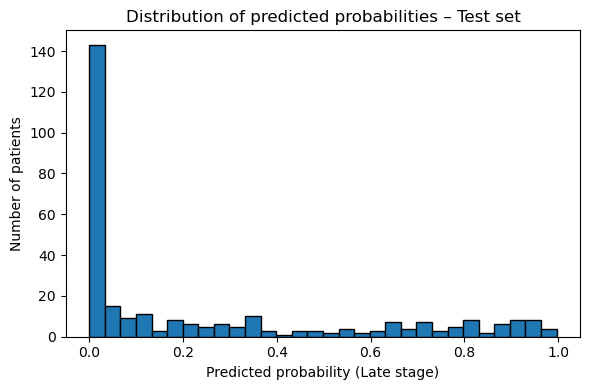

In [126]:
probs = probs_test.flatten()

plt.figure(figsize=(6,4))
plt.hist(probs, bins=30, edgecolor="black")
plt.xlabel("Predicted probability (Late stage)")
plt.ylabel("Number of patients")
plt.title("Distribution of predicted probabilities – Test set")
plt.tight_layout()
plt.show()

In [127]:
def collapse_check(y_true, y_pred):
    unique_preds = np.unique(y_pred)
    if len(unique_preds) == 1:
        print("⚠️ WARNING: Model predicts only one class:", unique_preds[0])
        
collapse_check(y_test, y_test_pred)

### enregistrer les résultats en pdf

In [128]:
import os
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import classification_report

def evaluate_and_save_pdf(
    y_true,
    y_pred,
    class_names,
    choix,
    output_dir="../results"
):
    # --- sécurité dossier ---
    os.makedirs(output_dir, exist_ok=True)

    # --- métriques ---
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro"
    )

    report = classification_report(
        y_true, y_pred, target_names=class_names
    )

    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    pdf_path = f"{output_dir}/evaluation_{choix}.pdf"

    with PdfPages(pdf_path) as pdf:

        # ===== PAGE 1 : Confusion matrix =====
        fig1, ax1 = plt.subplots(figsize=(7, 6))
        sns.heatmap(
            cm_df,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            ax=ax1
        )
        ax1.set_title(f"Confusion Matrix – {choix}")
        ax1.set_xlabel("Predicted")
        ax1.set_ylabel("True")
        fig1.tight_layout()
        pdf.savefig(fig1)
        plt.close(fig1)

        # ===== PAGE 2 : Metrics =====
        fig2, ax2 = plt.subplots(figsize=(8, 10))
        ax2.axis("off")

        summary_text = (
            f"Task: {choix}\n\n"
            f"Accuracy: {acc:.3f}\n"
            f"Precision (macro): {precision:.3f}\n"
            f"Recall (macro): {recall:.3f}\n"
            f"F1-score (macro): {f1:.3f}\n\n"
            "Classification report:\n"
        )

        ax2.text(
            0.01, 0.98,
            summary_text,
            va="top",
            ha="left",
            fontsize=11
        )

        ax2.text(
            0.01, 0.60,
            report,
            va="top",
            ha="left",
            fontsize=9,
            family="monospace"
        )

        ax2.set_title(f"Evaluation metrics – {choix}", fontsize=14)
        fig2.tight_layout()
        pdf.savefig(fig2)
        plt.close(fig2)

    print(f"PDF sauvegardé : {pdf_path}")

evaluate_and_save_pdf(
    y_true=y_test,
    y_pred=y_test_pred,
    class_names=class_names,
    choix=choix
)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

PDF sauvegardé : ../results/evaluation_mutation.pdf
